# Trabalho de Analise Exploratória
Aluno: Luiz Felipe Antunes Oliveira

A Análise Exploratória é uma fase importante de uma tarefa de Ciência de Dados. É nesta fase que buscamos entender os dados com os seguintes objetivos:

- Identificar padrões iniciais
- Formular perguntas de pesquisa e hipóteses
- Identificar dados incompletos ou não confiáveis

Para atingir os objetivos, em geral usa-se uma combinação de análises estatísticas com uma grande ênfase em geração e interpretação de gráficos.

## Leitura e análise inicial dos dados


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()


In [100]:
%matplotlib inline

df = pd.read_csv('C:/Users/Felipe Oliveira/Desktop/app002/Data_Cience/dataset/Video_Games_Sales_2016(LIMPO2).csv',
                      sep=',', encoding='utf-8')

In [101]:
df.drop(columns=['soma_total'], inplace=True)
df.head(50)

,NOME,PLATAFORMA,GENERO,VENDAS(AN),VENDAS(EU),VENDAS(JP),VENDAS(Outros),VENDAS(GLOBAL)
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,Platform,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,Misc,13.96,9.18,2.93,2.84,28.92
8,New Super Mario Bros. Wii,Wii,Platform,14.44,6.94,4.70,2.24,28.32
9,Duck Hunt,NES,Shooter,26.93,0.63,0.28,0.47,28.31


Vamos começar com perguntas iniciais:

Qual a média das notas de redações das pessoas que estudam em escola pública e privada? Qual a idade máxima? Quantos valores únicos possuímos para a coluna NOTA_REDACAO?

In [102]:
# Media de vendas:
df["VENDAS(GLOBAL)"].mean()
#df["VENDAS(EU)"].mean()
#df["VENDAS(AN)"].mean()
#df["VENDAS(JP)"].mean()
#df["VENDAS(Outros)"].mean()



0.5334617455285808

In [104]:
# Maximo de vendas maxima
df["VENDAS(AN)"].max()

41.36

In [105]:
# Valores únicos para VENDAS GLOBAIS
len(df.groupby(["VENDAS(EU)"]).size())

307

In [106]:
# Valores únicos para SUBDIVISAO
len(df.groupby(["VENDAS(AN)"]).size())

402

#### Visualização da distribuição das variáveis

Existe alguma diferença na distribuição das vendas entre PLATAFORMA e jogos mais comprados?

<AxesSubplot:>

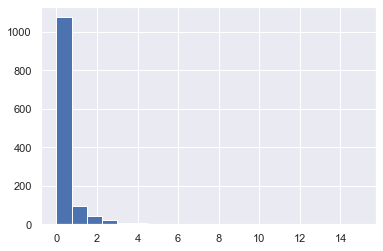

In [107]:
# Resposta para distribuição de plataforma X360
df_plat_x360 = df[df['PLATAFORMA'] == 'X360']
df_plat_x360["VENDAS(AN)"].hist(bins=20)

<AxesSubplot:ylabel='Density'>

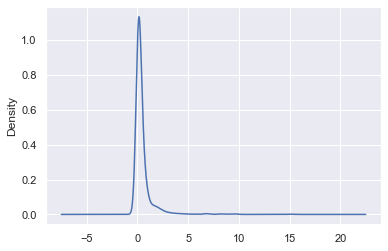

In [65]:
df_plat_x360["VENDAS(AN)"].plot.kde()

<AxesSubplot:>

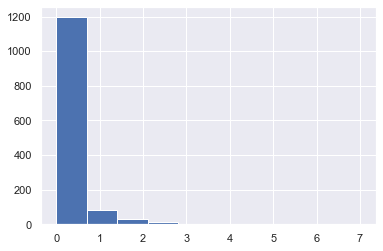

In [108]:
# Resposta para distribuição para PS3
df_plat_ps3 = df[df['PLATAFORMA'] == 'PS3']
df_plat_ps3["VENDAS(AN)"].hist(bins=10)

<AxesSubplot:ylabel='Density'>

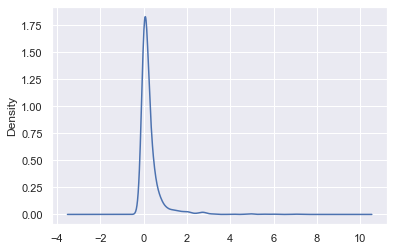

In [109]:
df_plat_ps3["VENDAS(AN)"].plot.kde()

Utilizando o seaborn para uma melhor visualização

In [110]:
sns.histplot(data=df, x="VENDAS(AN)", kde=True, hue="")

ValueError: Could not interpret value `` for parameter `hue`

<AxesSubplot:xlabel='NOTA_REDACAO', ylabel='Count'>

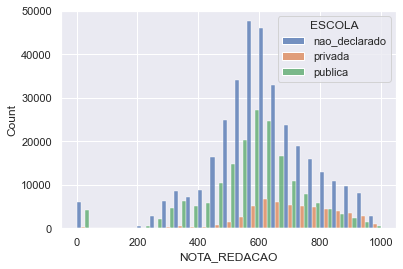

In [43]:
sns.histplot(data=df, x="NOTA_REDACAO", hue="ESCOLA", multiple="dodge", bins=25)

BoxPlot das idades de acordo com o sexo do reclamante para ver se as diferenças ficam mais óbvias.

In [111]:
sns.boxplot(data=df, x="VENDAS(EU)", y="")

ValueError: Could not interpret input ''

### Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

Fazemos uma contagem dos assuntos mais comuns (usando groupby) e criamos uma lista contendo os assuntos com mais de 60 reclamações. Utilizaremos a lista para uso posterior.

In [79]:
df_grouped_top = df.groupby(['PLATAFORMA']).size().reset_index(name='COUNT')
df_grouped_top = df_grouped_top[df_grouped_top['COUNT'] > 60]
list_grouped = list(df_grouped_top['PLATAFORMA'])
list_grouped

['2600',
 '3DS',
 'DS',
 'GB',
 'GBA',
 'GC',
 'N64',
 'NES',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SNES',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

Criando um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

In [125]:
df_plat = df[df['PLATAFORMA'].isin(list_grouped)]
df_plat

,NOME,PLATAFORMA,GENERO,VENDAS_AN,VENDAS_EU,VENDAS_JP,VENDAS_OUTROS,VENDAS_GLOBAL
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16712,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,0.01
16713,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,0.01
16714,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,0.01
16715,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,0.01


### Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Com o método crosstab() podemos gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas.

In [126]:
df_cross = pd.crosstab(df_plat.VENDAS_AN, df_plat.PLATAFORMA)
df_cross.head(20)

PLATAFORMA,2600,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
VENDAS_AN,,,,,,,,,,,,,,,,,,,,,
0.00,0,254,626,52,70,22,33,23,574,209,...,99,620,292,170,196,175,25,119,3,20
0.01,0,12,55,0,62,30,3,1,106,46,...,25,15,20,0,0,22,4,12,41,17
0.02,0,10,73,0,60,24,5,0,65,60,...,21,26,18,0,0,41,5,17,53,12
0.03,0,12,77,0,50,23,5,0,19,63,...,23,41,14,0,2,31,6,25,44,16
0.04,0,9,83,0,40,37,8,1,17,53,...,18,26,15,0,2,50,7,27,48,11
0.05,0,21,93,0,36,30,13,0,16,44,...,7,36,8,0,0,33,5,27,45,13
0.06,0,10,84,0,26,36,13,1,12,50,...,10,28,2,0,0,54,6,33,33,1
0.07,2,15,85,0,16,16,6,0,13,41,...,8,35,4,0,0,46,5,48,39,3
0.08,0,16,68,0,23,15,9,1,12,38,...,8,38,8,0,0,35,3,40,41,8


Usando o DataFrame obtido anteriormente vamos gerar a matriz de correlações entre escolas

In [95]:
df_corr = df_cross.corr()
df_corr

ESCOLA,nao_declarado,privada,publica
ESCOLA,,,
nao_declarado,1.000000,0.771494,0.977330
privada,0.771494,1.000000,0.624661
publica,0.977330,0.624661,1.000000


In [96]:
df_corr = df_corr.style.background_gradient(cmap="RdBu")
df_corr

ESCOLA,nao_declarado,privada,publica
ESCOLA,,,
nao_declarado,1.000000,0.771494,0.977330
privada,0.771494,1.000000,0.624661
publica,0.977330,0.624661,1.000000


In [100]:
df_reclamacao_bairro = pd.DataFrame(df_cross.sum(), columns=['COUNT'])
df_reclamacao_bairro

,COUNT
ESCOLA,
nao_declarado,345914
privada,55923
publica,179334


<AxesSubplot:xlabel='COUNT', ylabel='ESCOLA'>

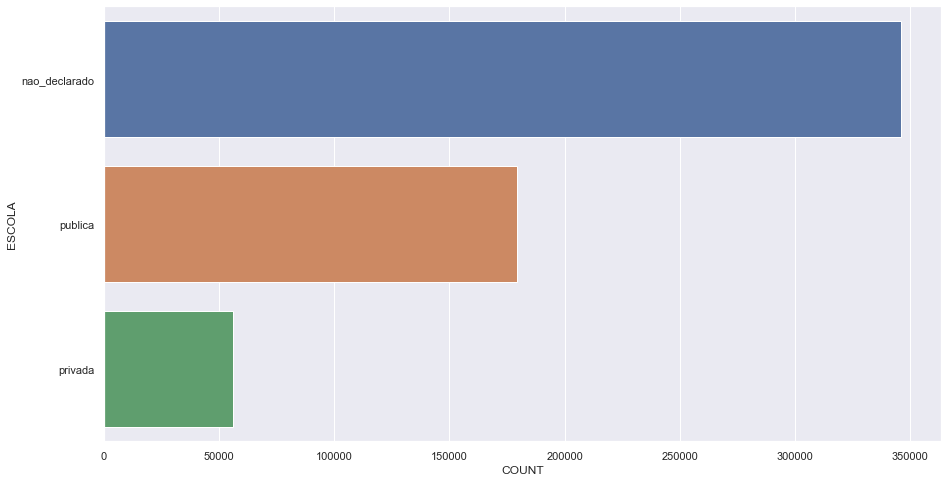

In [101]:
dfgraph = df.groupby(['ESCOLA']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=dfgraph, x="COUNT", y="ESCOLA", orient="h")